In [77]:
from sklearn.datasets import make_regression
import pandas as pd 
import numpy as np 

import plotly.express as px 
import plotly.graph_objects as go 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
X, y = make_regression(n_samples=100, n_features=2, n_targets=1, noise=50)

In [52]:
df = pd.DataFrame({'feature1':X[:,0], 'feature2':X[:,1], 'target':y})
df.head(2)

,feature1,feature2,target
0,-0.422637,0.388829,109.027116
1,0.450178,0.716134,71.854703


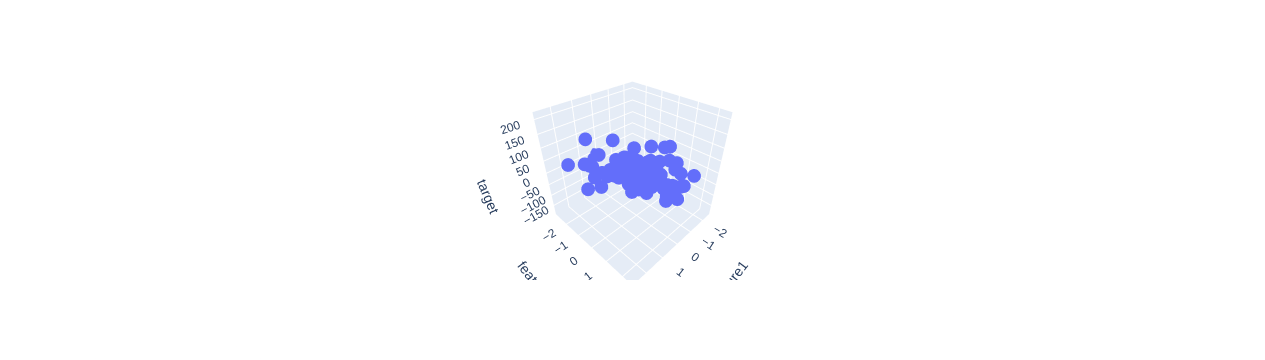

In [53]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')
fig.show()

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = lr.predict(X_test)

In [58]:
print('MAE: ',mean_absolute_error(y_test, y_pred))
print('MSE: ',mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

MAE:  41.15241340848242
MSE:  2249.3666237340676
R2 score: 0.24008098348019002


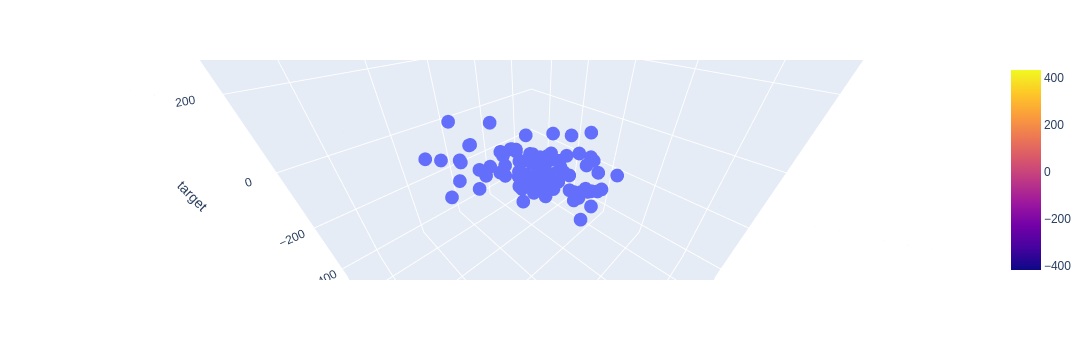

In [70]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(x, y)

# Combine the grid into a single dataset for prediction
final = np.vstack((xGrid.ravel(), yGrid.ravel())).T

# Predict z values and reshape to match the grid
z_final = lr.predict(final).reshape(10, 10)

# Assign z to the final prediction grid
z = z_final

fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')
fig.add_trace(go.Surface(x=x, y=y, z=z))
fig.show()